In [106]:
import pandas as pd

In [107]:
dataset=pd.read_csv('Preprocessed.csv')

In [108]:
dataset

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000


In [4]:
dataset.isnull().sum()

gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
dtype: int64

In [5]:
import seaborn as sns

In [9]:
from Univariate import QuanQual

<Axes: xlabel='ssc_p', ylabel='Count'>

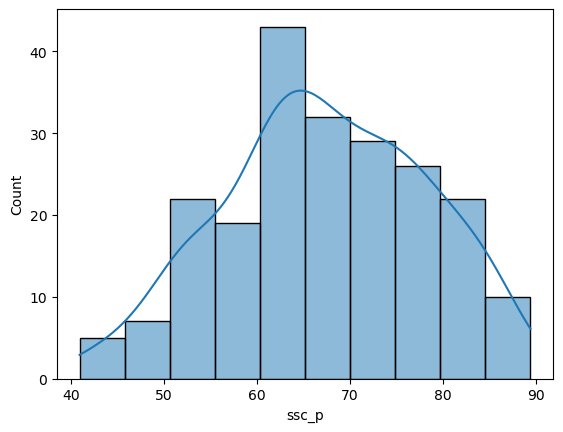

In [6]:
sns.histplot(dataset["ssc_p"], kde=True)

In [86]:
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm
sample=dataset
sample_mean=sample['ssc_p'].mean()
sample_std=sample['ssc_p'].std()
print("Mean=%.3f" % sample_mean, "Std Deviance=%.3f" % sample_std)
dist=norm(sample_mean, sample_std)

Mean=67.303 Std Deviance=10.827


In [87]:
def pdf_probability(dataset, startrange, endrange):
    import seaborn as sns
    from matplotlib import pyplot
    from scipy.stats import norm
    ax=sns.histplot(dataset, kde=True, color="Green")
    pyplot.axvline(startrange, color= "Red")
    pyplot.axvline(endrange, color= "Red")
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print("Mean=%.3f" % sample_mean, "Std Deviance=%.3f" % sample_std)
    dist=norm(sample_mean, sample_std)
    values=[value for value in range(startrange, endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between the range({}, {}):{}".format(startrange, endrange, prob))
    return prob

Mean=66.333 Std Deviance=10.898
The area between the range(50, 80):0.825458328152838


0.825458328152838

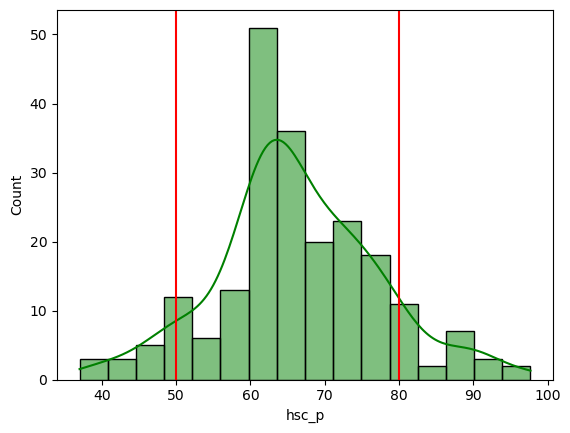

In [93]:
pdf_probability(dataset['hsc_p'], 50, 80)

In [100]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["ssc_p"])
ecdf(80)

0.8651162790697674

In [115]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score= [((j-mean)/std)for j in values]
    sns.distplot(z_score, kde=True)
    sum(z_score)/len(z_score)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2492\1912244325.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score, kde=True)


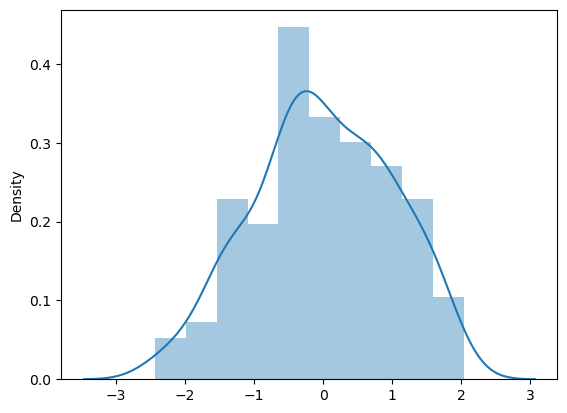

In [116]:
stdNBgraph(dataset['ssc_p'])

In [121]:
def stdNDgraph(dataset):
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score= [((j-mean)/std) for j in values]
    import seaborn as sns
    sns.distplot(z_score, kde=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_2492\2917601051.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score, kde=True)


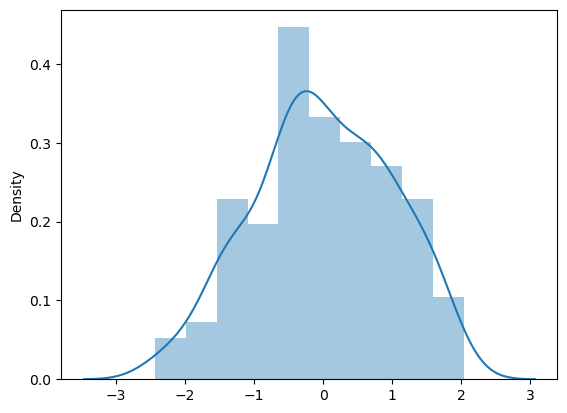

In [123]:
stdNDgraph(dataset['ssc_p'])